In [0]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import nltk
import re
import seaborn as sns

In [0]:
df = pd.read_csv('/content/drive/My Drive/trumptweets.csv')

In [0]:
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [0]:
df.drop(['link','mentions','hashtags','geo'], inplace=True, axis=1)

In [0]:
df.head()

,id,content,date,retweets,favorites
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,1701461182,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24
4,1773561338,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965


In [0]:
y_m = df['date'].str.extract(r'([0-9]{4}-[0-9]{2})')
df['date'] = df['date'].str.extract(r'([0-9]{4})', expand=False)

In [0]:
df.insert(3, 'Year-Month', y_m)

In [0]:
df.head()

,id,content,date,Year-Month,retweets,favorites
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009,2009-05,500,868
1,1701461182,Donald Trump will be appearing on The View tom...,2009,2009-05,33,273
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009,2009-05,12,18
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009,2009-05,11,24
4,1773561338,"""My persona will never be that of a wallflower...",2009,2009-05,1399,1965


In [0]:
df.rename(columns = {'content' : 'Tweet',
                     'date' : 'Year',
                     'retweets' : 'Retweets',
                     'favorites' : 'Favorites'}, inplace = True)

In [0]:
df.head()

,id,Tweet,Year,Year-Month,Retweets,Favorites
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009,2009-05,500,868
1,1701461182,Donald Trump will be appearing on The View tom...,2009,2009-05,33,273
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009,2009-05,12,18
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009,2009-05,11,24
4,1773561338,"""My persona will never be that of a wallflower...",2009,2009-05,1399,1965


In [0]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
sent_model = SentimentIntensityAnalyzer()

In [0]:
def get_sentiment(tweet):
  s_scores = sent_model.polarity_scores(tweet)
  if s_scores['compound'] >= 0.05:
    return 'positive'
  elif s_scores['compound'] <= -0.05:
    return 'negative'
  else:
    return 'neutral'

In [0]:
tweet_sents = []

for tweet in df['Tweet']:
  tweet_sents.append(get_sentiment(tweet))

In [0]:
sentiments = pd.DataFrame({'Sentiment' : tweet_sents})

In [0]:
s_df = pd.concat([df,sentiments], axis=1)

In [0]:
s_df.head()

,id,Tweet,Year,Year-Month,Retweets,Favorites,Sentiment
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009,2009-05,500,868,positive
1,1701461182,Donald Trump will be appearing on The View tom...,2009,2009-05,33,273,positive
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009,2009-05,12,18,positive
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009,2009-05,11,24,neutral
4,1773561338,"""My persona will never be that of a wallflower...",2009,2009-05,1399,1965,neutral


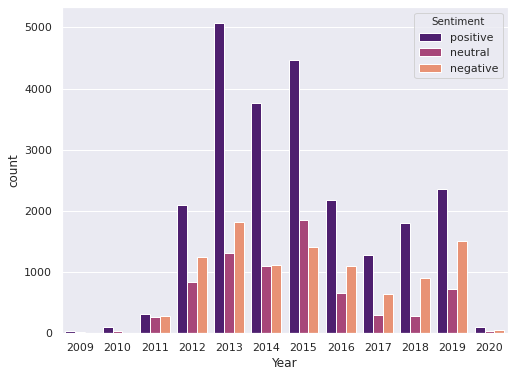

In [0]:
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.countplot(x='Year', hue='Sentiment', data=s_df, palette='magma')

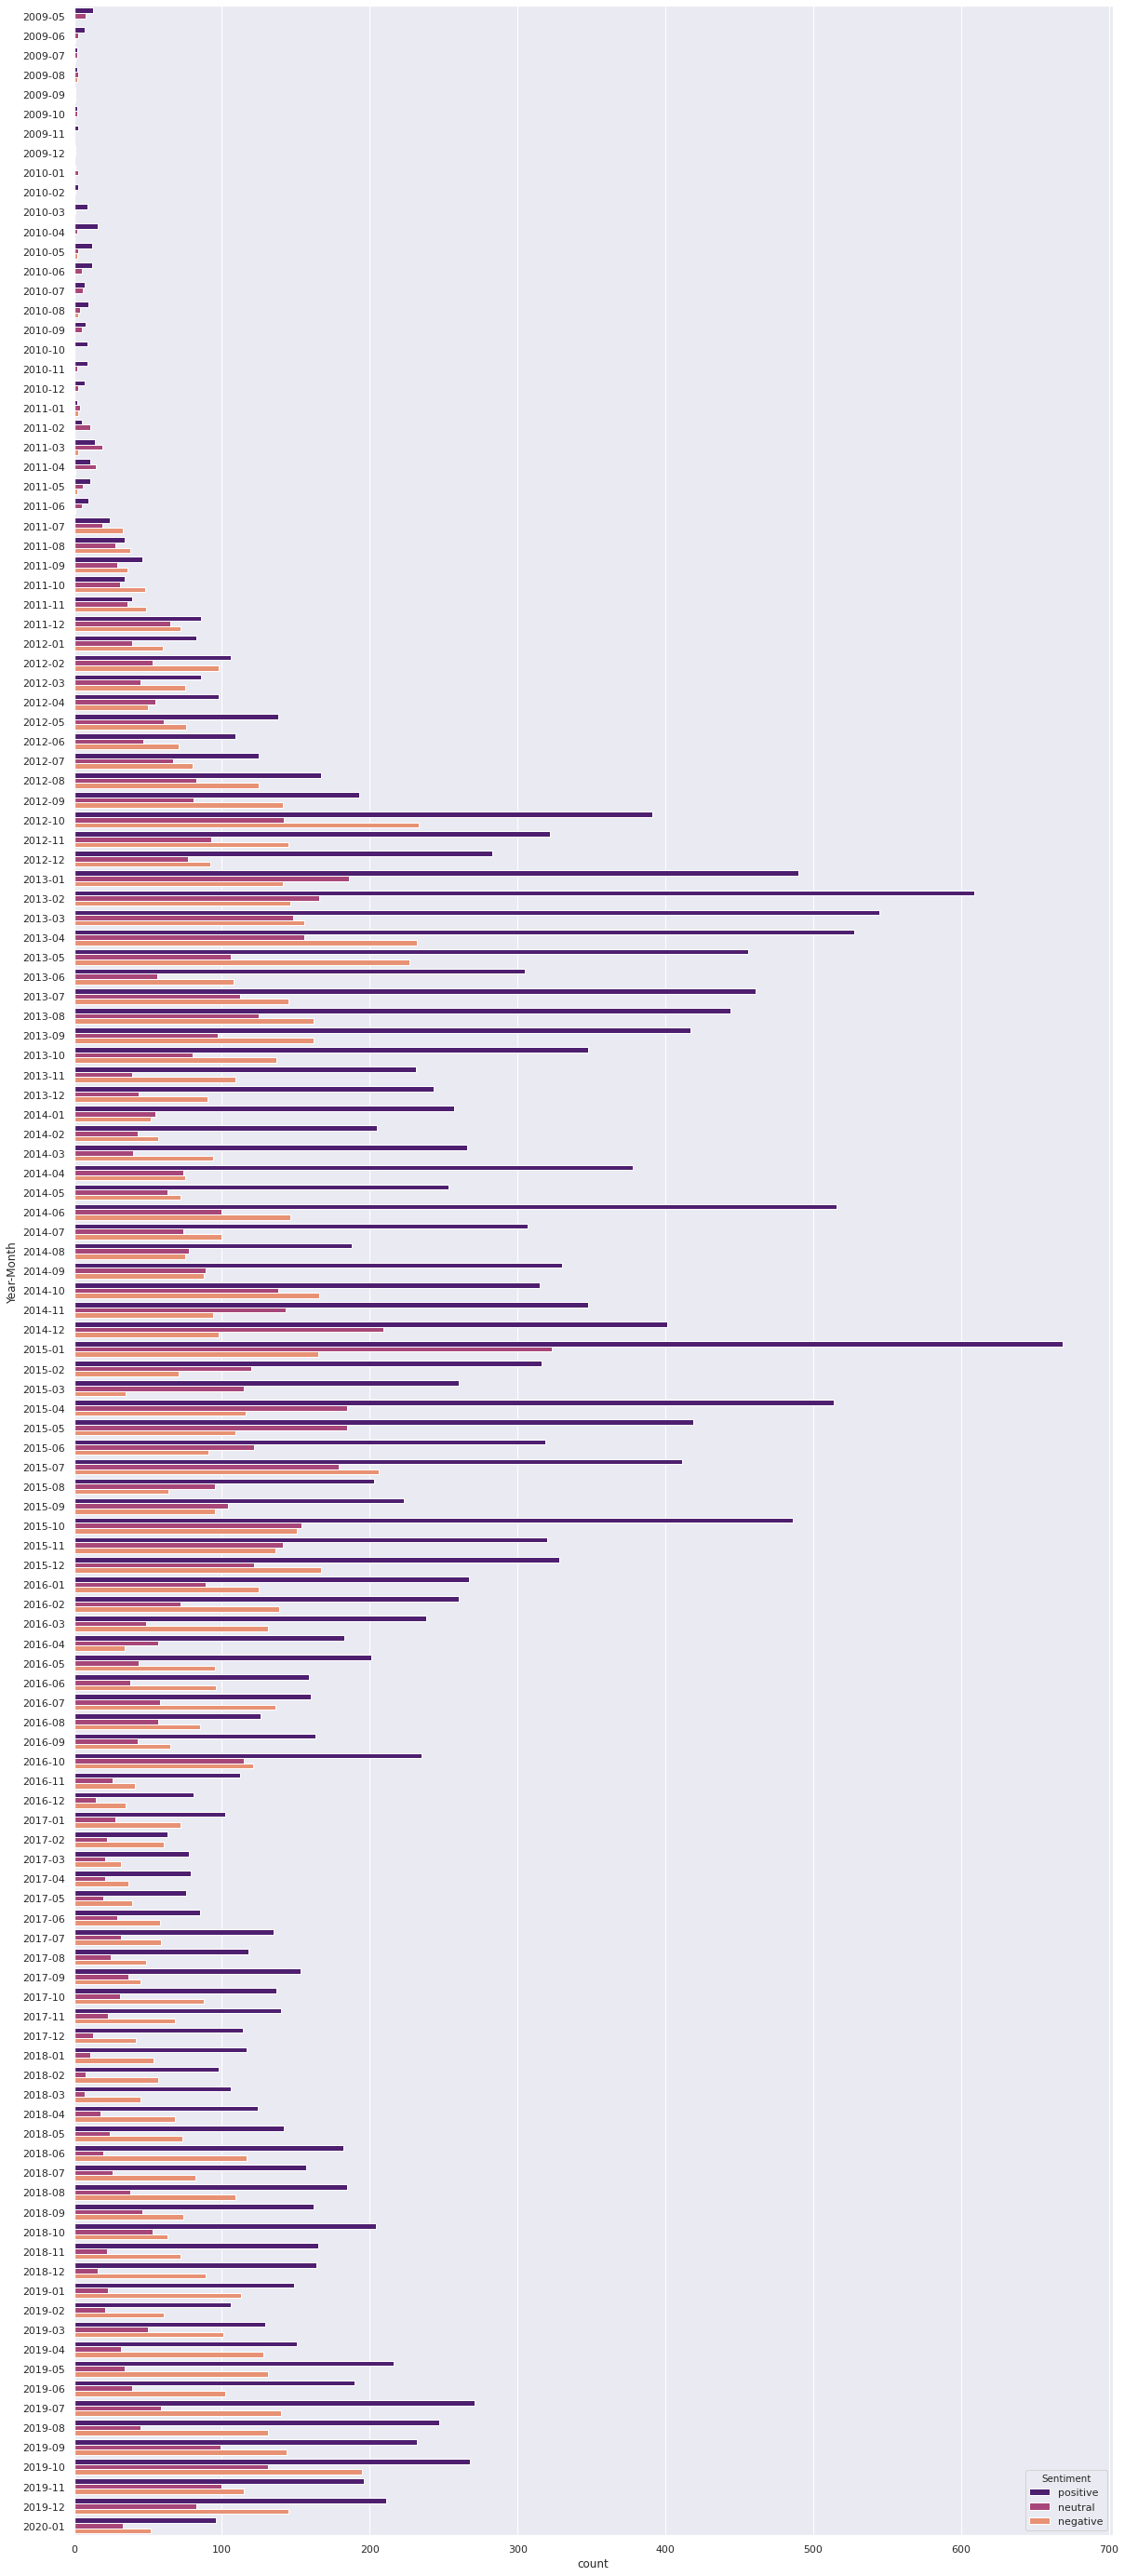

In [0]:
sns.set(rc={'figure.figsize':(20,50)})
ax = sns.countplot(y='Year-Month', hue='Sentiment', data=s_df, palette='magma')

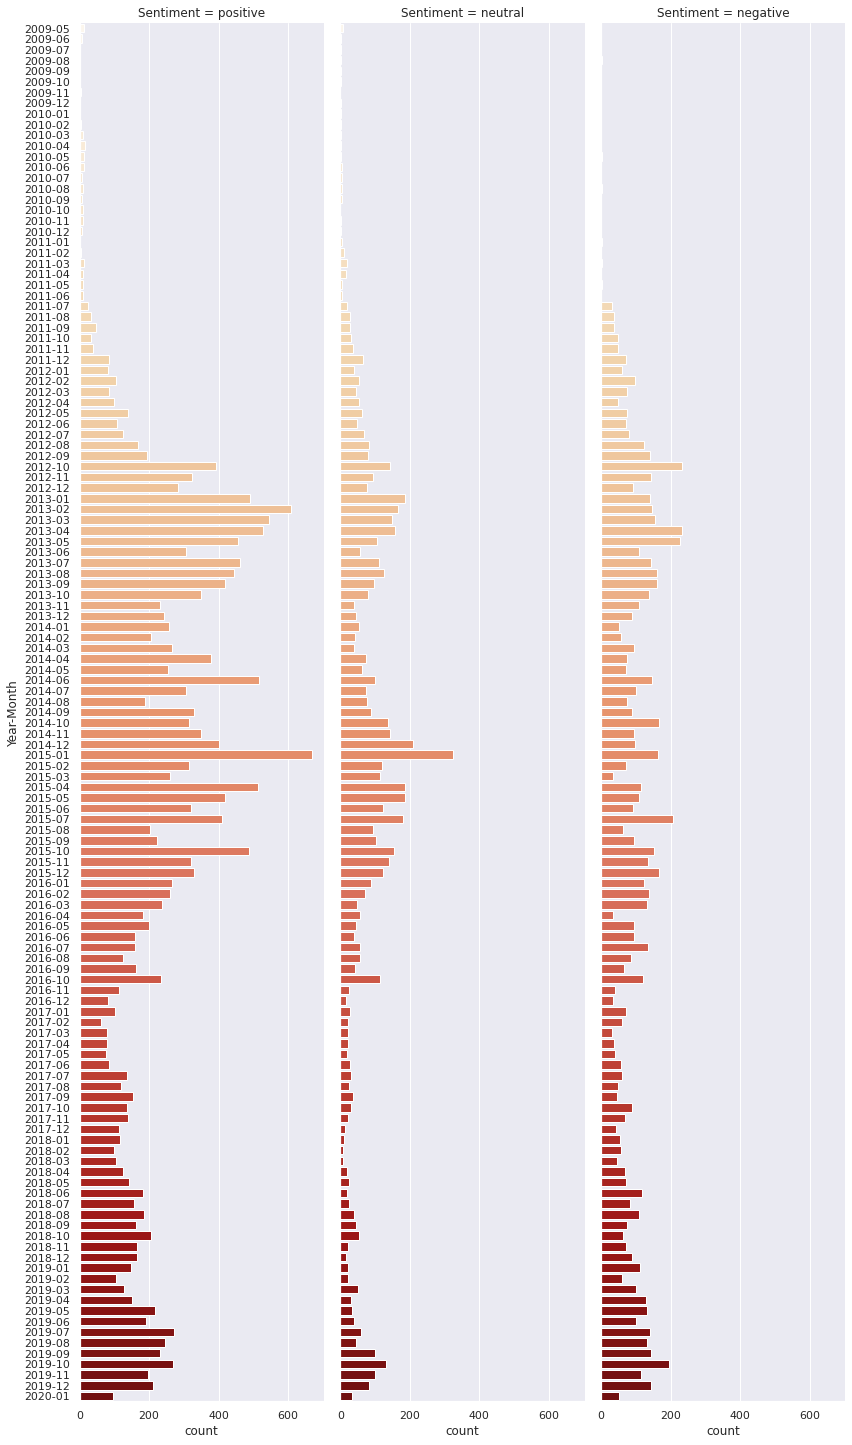

In [0]:
ax = sns.catplot(y='Year-Month', col='Sentiment', data=s_df, kind='count',
                 height = 20, aspect=0.2, palette='OrRd')

In [0]:
|years = []
count = [] # Pos/Neg/Neu
sent = [] # Pos/Neg/Neu

for year in list(senti_df['Date'].unique()):
  years.extend([year]*3)

  count.extend([
    len(senti_df[(senti_df['Date']==str(year)) & (senti_df['Sentiment']=='positive')]),
    len(senti_df[(senti_df['Date']==str(year)) & (senti_df['Sentiment']=='negative')]),
    len(senti_df[(senti_df['Date']==str(year)) & (senti_df['Sentiment']=='neutral')])
  ])

  sent.extend(['Positive', 'Negative', 'Neutral'])

In [0]:
len(senti_df[(senti_df['Date']==str(2012)) & (senti_df['Sentiment']=='positive')])

2101

In [0]:
time_df = pd.DataFrame({'Year':years, 'Sentiments':sent, 'Sent frequency':count})

In [0]:
ax = sns.violinplot(x='Years', y=)

41122

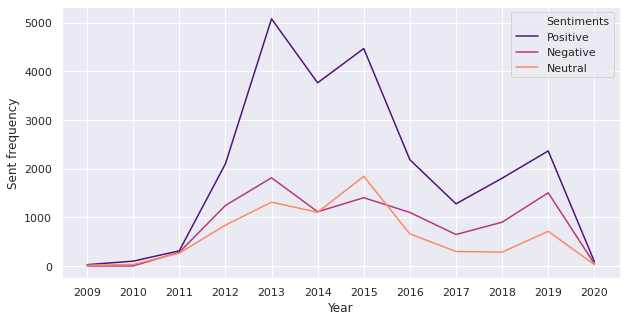

In [0]:
ax = sns.lineplot(x='Year', y='Sent frequency', hue='Sentiments', data=time_df, palette='magma')